In [1]:
#x1 XOR x2 (logistic regression ) (작동 안되는게 정답이었음 ㅋㅋㅋㅋ 아나 ㅋㅋㅋㅋㅋ)
# XOR problem
import tensorflow as tf
import numpy as np

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])
W = tf.Variable(tf.random_normal([2,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

#hypothesis = tf.div(1./1.+tf.exp(tf.matmul(X,W)+b))
hypothesis = tf.sigmoid(tf.matmul(X,W)+b)

cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(hypothesis,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nCoeect: ",p,"\naccuracy: ",a)


Instructions for updating:
Colocations handled automatically by placer.
cost: 0.92503524
cost: 0.69314766
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472
cost: 0.6931472

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Coeect:  [[0.]
 [0.]
 [0.]
 [0.]] 
accuracy:  0.0


In [2]:
#x1 XOR x2 Neural Network (layer 형성하기) z1, z2
import tensorflow as tf
import numpy as np

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])

#layer1이 추가된것 이외에 나머지 소스코드는 동일
#layer의 추가로 학습가능하다는게 진짜 신기하다..
#weight의 크기에 주의. layer1에 의해 y1,y2의  출력이 나옴
W1 = tf.Variable(tf.random_normal([2,2]),name = "weight1")
b1 = tf.Variable(tf.random_normal([2]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

#layer1, 즉 y1,y2의 출력으로 xor을 학습시키면 xor도 학습가능
W2 = tf.Variable(tf.random_normal([2,1]), name = "weight2")
b2 = tf.Variable(tf.random_normal([1]),name = "bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)


cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nPrediction: ",p,"\naccuracy:  {:.2%}".format(a))
    

cost: 0.8663662
cost: 0.6932412
cost: 0.6923208
cost: 0.6897037
cost: 0.6710062
cost: 0.58073497
cost: 0.35859028
cost: 0.15776327
cost: 0.09129598
cost: 0.06264144
cost: 0.04722185

Hypothesis:  [[0.04177612]
 [0.9478278 ]
 [0.9458164 ]
 [0.03625092]] 
Prediction:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  100.00%


In [3]:
#how about wide NN for XOR?

#x1 XOR x2 Neural Network (layer 형성하기) z1, z2

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])

#layer1이 10개의 출력. (wide Neural Network)
#weight의 크기에 주의. layer1에 의해 y1,y2...의  출력이 나옴
W1 = tf.Variable(tf.random_normal([2,10]),name = "weight1")
b1 = tf.Variable(tf.random_normal([10]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,1]), name = "weight2")
b2 = tf.Variable(tf.random_normal([1]),name = "bias2")
hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)


cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nPrediction: ",p,"\naccuracy:  {:.2%}".format(a))
# -> 작은값은 더 작아지고 큰값은 더 커져서 cost가 줄어들음
# 더 학습이 잘 됨.

cost: 0.78604996
cost: 0.59444976
cost: 0.21718867
cost: 0.06514079
cost: 0.03188567
cost: 0.019967852
cost: 0.014191889
cost: 0.010869353
cost: 0.008740524
cost: 0.0072725257
cost: 0.006205007

Hypothesis:  [[0.00578073]
 [0.9933375 ]
 [0.9942266 ]
 [0.00652623]] 
Prediction:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  100.00%


In [4]:
#how about Deep Neural Network for XOR? (넓게 말고 깊게)

#x1 XOR x2 Neural Network (layer 형성하기) z1, z2

x_data = np.array([[0,0],[0,1],[1,0],[1,1]], dtype = np.float32)
y_data = np.array([[0],  [1],  [1],  [0]],dtype = np.float32)

X = tf.placeholder(dtype = tf.float32, shape = [None, 2])
Y = tf.placeholder("float", shape = [None, 1])

#layer1이 10개의 출력. (wide Neural Network)
#weight의 크기에 주의. layer1에 의해 y1,y2...의  출력이 나옴
W1 = tf.Variable(tf.random_normal([2,10]),name = "weight1")
b1 = tf.Variable(tf.random_normal([10]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([10,10]),name = "weight2")
b2 = tf.Variable(tf.random_normal([10]), name = "bias2")
layer2 = tf.sigmoid(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([10,10]),name = "weight3")
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")
layer3 = tf.sigmoid(tf.matmul(layer2,W3)+b3)

W4 = tf.Variable(tf.random_normal([10,1]), name = "weight4")
b4 = tf.Variable(tf.random_normal([1]),name = "bias4")
hypothesis = tf.sigmoid(tf.matmul(layer3,W4)+b4)


cost = -tf.reduce_mean(Y*tf.log(hypothesis)+(1-Y)*tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#Accuracy computation
#True is hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype = tf.float32))

#launch graph
with tf.Session() as sess:
    #Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict = {X:x_data,Y:y_data})
        if step%1000 == 0:
            cost_val = sess.run(cost, feed_dict = {X:x_data, Y:y_data})# cost.eval(session = sess, feed_dict = {X:x_data, Y:y_data})
            print("cost:",cost_val)
        
        
        #Accuracy report
    h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nPrediction: ",p,"\naccuracy:  {:.2%}".format(a))
    
# -> wide만한 학습보다 깊기까지한 학습이 더 효과가 좋음
# 작은값은 더더 작게 큰값은 더더 크게. cost더 줄어들음

cost: 1.0131955
cost: 0.16869633
cost: 0.018434986
cost: 0.00835059
cost: 0.005222288
cost: 0.0037465189
cost: 0.0028991639
cost: 0.0023534787
cost: 0.0019744928
cost: 0.0016968247
cost: 0.0014851815

Hypothesis:  [[0.00120515]
 [0.998242  ]
 [0.9987    ]
 [0.00167307]] 
Prediction:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  100.00%


In [6]:
#MNIST_data 로 NN 학습시켜보기 (연습)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
tf.set_random_seed(777)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

Extracting MNIST_data1/train-images-idx3-ubyte.gz
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz


Instructions for updating:
Use tf.cast instead.
Epoch: 0001, Cost: 2.227771677
Epoch: 0002, Cost: 1.790985774
Epoch: 0003, Cost: 1.635107522
Epoch: 0004, Cost: 1.538924884
Epoch: 0005, Cost: 1.453332590
Epoch: 0006, Cost: 1.381762269
Epoch: 0007, Cost: 1.320704583
Epoch: 0008, Cost: 1.272027738
Epoch: 0009, Cost: 1.235802109
Epoch: 0010, Cost: 1.207248215
Epoch: 0011, Cost: 1.182362826
Epoch: 0012, Cost: 1.162739255
Epoch: 0013, Cost: 1.145295643
Epoch: 0014, Cost: 1.128017817
Epoch: 0015, Cost: 1.105646763
Epoch: 0016, Cost: 1.065359680
Epoch: 0017, Cost: 1.027465341
Epoch: 0018, Cost: 1.001246840
Epoch: 0019, Cost: 0.981511811
Epoch: 0020, Cost: 0.965764829
Epoch: 0021, Cost: 0.952753433
Epoch: 0022, Cost: 0.942429821
Epoch: 0023, Cost: 0.933846764
Epoch: 0024, Cost: 0.925842912
Epoch: 0025, Cost: 0.919915050
Epoch: 0026, Cost: 0.914371379
Epoch: 0027, Cost: 0.909335029
Epoch: 0028, Cost: 0.904683248
Epoch: 0029, Cost: 0.900203911
Epoch: 0030, Cost: 0.896312731
Epoch: 0031, Cost: 0.8

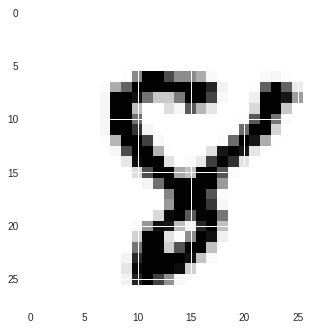

Label:  [3]
Prediction:  [3]


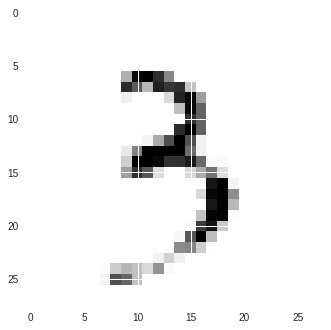

In [7]:
nb_classes = 10 
 
 
 # MNIST data image of shape 28 * 28 = 784 
X = tf.placeholder(tf.float32, [None, 784]) 
 # 0 - 9 digits recognition = 10 classes 
Y = tf.placeholder(tf.float32, [None, nb_classes]) 

#Using Neural Network
output_num = 50
W1 = tf.Variable(tf.random_normal([784,output_num])) 
b1 = tf.Variable(tf.random_normal([output_num])) 
layer1 = tf.nn.softmax(tf.matmul(X,W1) + b1)

#W2 = tf.Variable(tf.random_normal([output_num, output_num])) 
#b2 = tf.Variable(tf.random_normal([output_num])) 
#layer2 = tf.nn.softmax(tf.matmul(layer1,W2) + b2)
 
# Hypothesis (using softmax) 
W2 = tf.Variable(tf.random_normal([output_num, nb_classes])) 
b2 = tf.Variable(tf.random_normal([nb_classes])) 
hypothesis = tf.nn.softmax(tf.matmul(layer1, W2) + b2) 

 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

 
# Test model 
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1)) 
 # Calculate accuracy 
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) 

 
# parameters 
num_epochs = 200
batch_size = 100 
num_iterations = int(mnist.train.num_examples / batch_size) 

 
with tf.Session() as sess: 
    # Initialize TensorFlow variables 
    sess.run(tf.global_variables_initializer()) 
    # Training cycle 
    for epoch in range(num_epochs): 
        avg_cost = 0 

 
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) 
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys}) 
            avg_cost += cost_val / num_iterations 

 
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost)) 

 
    print("Learning finished") 

 
    # Test the model using test sets 
    print( 
        "Accuracy: {:.2%}".format( 
        accuracy.eval( 
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}) 
        ), 
    ) 

 
    for i in range(2):
        # Get one and predict 
        r = random.randint(0, mnist.test.num_examples - 1) 
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1))) 
        print( 
            "Prediction: ", 
            sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}), 
        ) 

 
        plt.imshow( 
            mnist.test.images[r : r + 1].reshape(28, 28), 
            cmap="Greys", 
            interpolation="nearest", 
        ) 
        plt.show() 
#deep한 layer를 사용하면 오히려 cost감소가 너무 더뎌지는것이 관측됨.
#one_layer에서 num_epochs를 늘려야 겨우 비슷하게나마 학습되는것이 관측.
#근데 아무리해도 cost값은 내려가도 accuracy값이 만족스럽지 않음... 아마도 다음 수업에서 이유 알려줄듯?
#앗! 그런데 layer 한층에 output_num = 55, num_epochs = 100 으로 학습해서 91.39%의 accuracy 얻음!! 오예!!
#91.39%면 꽤 높은 정확도인듯 나치고는.